# Cuisine_Rating_Analysis

#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Cuisine_rating.csv')
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


#### Data Exploration

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64


In [4]:
# Calculate summary statistics
summary_stats = df.describe()
print(summary_stats)

          User ID   Area code          YOB      Budget  Food Rating  \
count  200.000000  200.000000   200.000000  200.000000   200.000000   
mean   100.500000  141.060000  1984.830000    3.815000     3.220000   
std     57.879185   26.130257    16.809339    1.056578     1.411226   
min      1.000000  101.000000  1955.000000    1.000000     1.000000   
25%     50.750000  123.000000  1971.000000    3.000000     2.000000   
50%    100.500000  135.000000  1987.000000    4.000000     3.000000   
75%    150.250000  158.000000  2000.000000    5.000000     5.000000   
max    200.000000  199.000000  2009.000000    5.000000     5.000000   

       Service Rating  Overall Rating  
count      200.000000      200.000000  
mean         3.230000        3.225000  
std          1.526022        1.079445  
min          1.000000        1.000000  
25%          2.000000        2.500000  
50%          3.000000        3.000000  
75%          5.000000        4.000000  
max          5.000000        5.000000  


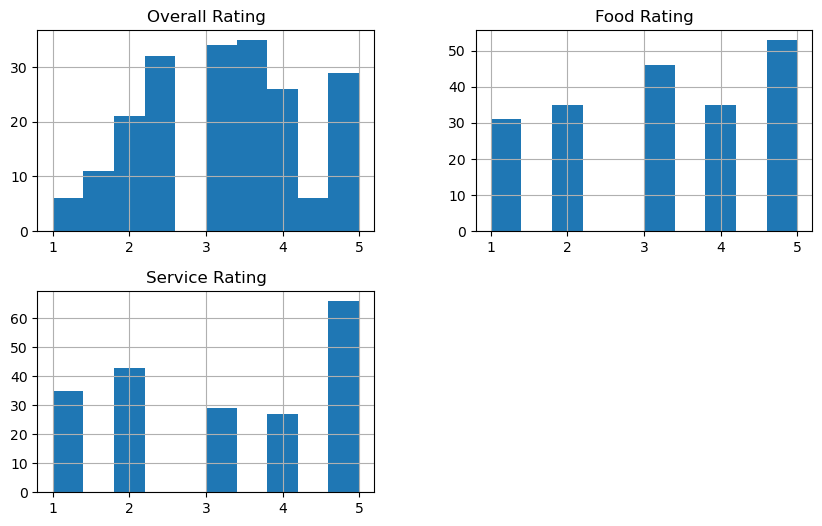

In [5]:
# Assuming 'Rating' columns include 'Overall Rating', 'Food Rating', 'Service Rating'
df[['Overall Rating', 'Food Rating', 'Service Rating']].hist(figsize=(10, 6))
plt.show()

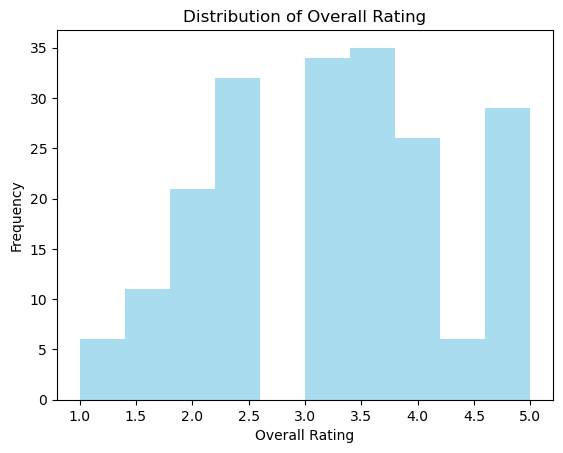

In [6]:
# Visualize the distribution of ratings
import matplotlib.pyplot as plt
plt.hist(df['Overall Rating'], bins=10, color='skyblue', alpha=0.7)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Rating')
plt.show()


In [7]:
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr(method='pearson')
print(correlation_matrix)



                 User ID  Area code       YOB    Budget  Food Rating  \
User ID         1.000000   0.463977  0.006203 -0.010148    -0.003691   
Area code       0.463977   1.000000 -0.065006 -0.046191     0.000458   
YOB             0.006203  -0.065006  1.000000 -0.071383     0.040774   
Budget         -0.010148  -0.046191 -0.071383  1.000000     0.057764   
Food Rating    -0.003691   0.000458  0.040774  0.057764     1.000000   
Service Rating  0.111227  -0.011942  0.043651 -0.135542     0.079056   
Overall Rating  0.076208  -0.008142  0.057508 -0.058049     0.709562   

                Service Rating  Overall Rating  
User ID               0.111227        0.076208  
Area code            -0.011942       -0.008142  
YOB                   0.043651        0.057508  
Budget               -0.135542       -0.058049  
Food Rating           0.079056        0.709562  
Service Rating        1.000000        0.758532  
Overall Rating        0.758532        1.000000  


#### Demographic Analysis

In [8]:
#What is the distribution of genders among customers?
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

Gender
Male      118
Female     82
Name: count, dtype: int64


In [9]:
#What is the distribution of age groups (based on Year of Birth)?
age_distribution = df['YOB'].value_counts()
print(age_distribution)

YOB
1974    12
2006    10
2000    10
2001     8
1998     8
1995     6
1977     6
2002     6
1969     6
2007     6
1956     6
2003     6
2009     6
1989     4
1976     4
2005     4
1981     4
1962     4
1964     4
1955     4
1996     4
1961     4
1985     4
1987     4
1975     4
1999     4
1988     4
1971     4
1959     4
1991     4
1965     4
1963     4
1990     2
1960     2
1978     2
1979     2
1994     2
1957     2
2004     2
1980     2
1997     2
1958     2
1983     2
1967     2
1986     2
1982     2
Name: count, dtype: int64


In [10]:
#How does marital status vary among customers?
marital_status_distribution = df['Marital Status'].value_counts()
print(marital_status_distribution)

Marital Status
Single      100
Married      86
Divorced     14
Name: count, dtype: int64


#### Location Analysis

In [11]:
# Replace the incorrect city name with the correct one
df['Location'] = df['Location'].replace({'Central Park,ny': 'Central Park,NY'})

In [12]:
# Check unique values in the 'Location' column
unique_locations = df['Location'].unique()
print(unique_locations)

['Upper East Side,NY' 'St. George,NY' 'Upper West Side,NY'
 'Central Park,NY' 'China Town, NY' 'Riverdale,NY' 'Market City, NY'
 'Market City, MY' 'Cedar Hill, NY']


In [13]:
#What are the most common locations visited by customers?
location_distribution = df['Location'].value_counts()
print(location_distribution)

Location
St. George,NY         46
Central Park,NY       32
Upper East Side,NY    30
Riverdale,NY          28
China Town, NY        22
Market City, NY       20
Upper West Side,NY    18
Market City, MY        2
Cedar Hill, NY         2
Name: count, dtype: int64


In [14]:
#Is there any correlation between location and ratings?
ratings_by_location = df.groupby('Location')[['Overall Rating', 'Food Rating', 'Service Rating']].mean()
print(ratings_by_location)

                    Overall Rating  Food Rating  Service Rating
Location                                                       
Cedar Hill, NY            3.500000     2.000000        5.000000
Central Park,NY           3.500000     3.343750        3.656250
China Town, NY            3.159091     2.681818        3.636364
Market City, MY           3.000000     4.000000        2.000000
Market City, NY           3.725000     4.050000        3.400000
Riverdale,NY              3.053571     3.035714        3.071429
St. George,NY             3.119565     3.413043        2.826087
Upper East Side,NY        3.016667     2.966667        3.066667
Upper West Side,NY        3.138889     3.000000        3.277778


#### Activity Analysis

In [15]:
#What are the predominant activities of customers?
# Activity distribution
activity_distribution = df['Activity'].value_counts()
print(activity_distribution)

Activity
Student         120
Professional     80
Name: count, dtype: int64


In [16]:
#Do certain activities correlate with higher ratings?
# Ratings by activity
# Group by activity and calculate mean ratings
ratings_by_activity = df.groupby('Activity')[['Overall Rating', 'Food Rating', 'Service Rating']].mean()
print(ratings_by_activity)

              Overall Rating  Food Rating  Service Rating
Activity                                                 
Professional        3.443750     3.387500            3.50
Student             3.079167     3.108333            3.05


#### Budget and Cuisine Analysis

In [17]:
#How do budget preferences vary among customers?
# Budget distribution
budget_distribution = df['Budget'].value_counts()
print(budget_distribution)

Budget
4    63
5    62
3    61
1    10
2     4
Name: count, dtype: int64


In [18]:
#What are the most popular cuisines among customers?
# Cuisine distribution
cuisine_distribution = df['Cuisines'].value_counts()
print(cuisine_distribution)

Cuisines
Japanese    36
Filipino    34
French      34
Indian      32
Chinese     24
Seafood     22
Italian     18
Name: count, dtype: int64


In [19]:
#Alchol and Smoking Habits Analysis
df.head(2)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No


In [20]:
#How common are alcohol consumption and smoking habits among customers?
# Alcohol consumption distribution
alcohol_distribution = df["Alcohol "].value_counts()
print(alcohol_distribution)

Alcohol 
Never       88
Often       61
Socially    51
Name: count, dtype: int64


In [21]:
#Is there any correlation between alcohol consumption/smoking and ratings?
# Smoking habits distribution
smoker_distribution = df['Smoker'].value_counts()
print(smoker_distribution)

Smoker
Socially    71
Often       70
Never       59
Name: count, dtype: int64


In [22]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### Visualizations 

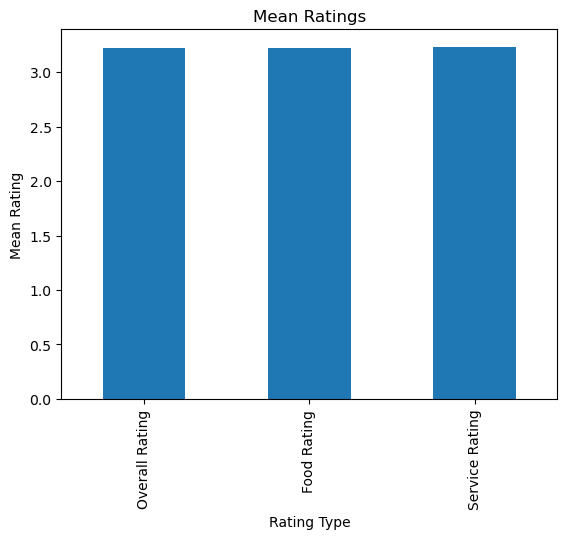

In [23]:
# Assuming 'Rating' columns include 'Overall Rating', 'Food Rating', 'Service Rating'
df[['Overall Rating', 'Food Rating', 'Service Rating']].mean().plot(kind='bar')
plt.xlabel('Rating Type')
plt.ylabel('Mean Rating')
plt.title('Mean Ratings')
plt.show()


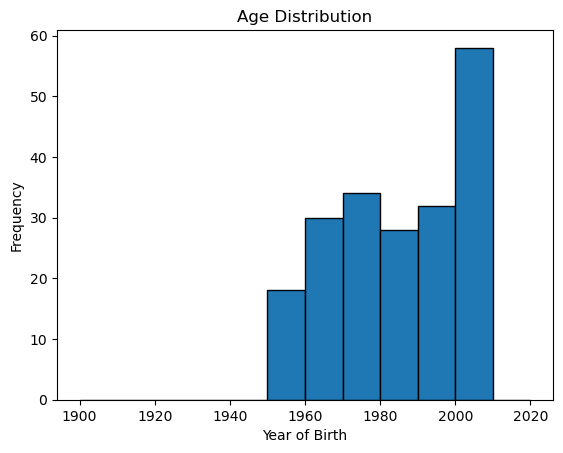

In [24]:
#Histogram
plt.hist(df['YOB'], bins=range(1900, 2023, 10), edgecolor='black')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


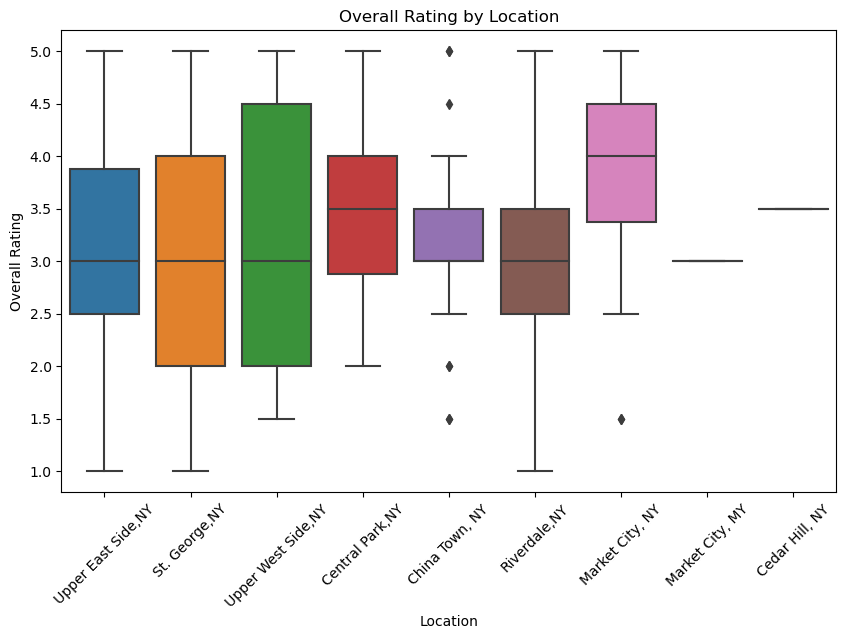

In [25]:
# Assuming 'Location' and 'Activity' are categorical columns
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Overall Rating', data=df)
plt.xticks(rotation=45)
plt.title('Overall Rating by Location')
plt.show()


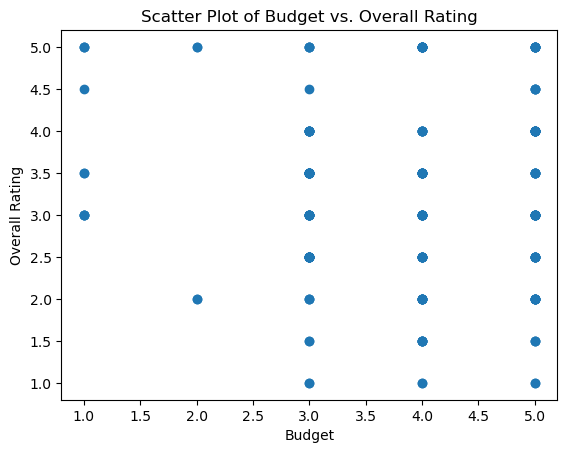

In [26]:
#scatter plot
plt.scatter(df['Budget'], df['Overall Rating'])
plt.xlabel('Budget')
plt.ylabel('Overall Rating')
plt.title('Scatter Plot of Budget vs. Overall Rating')
plt.show()


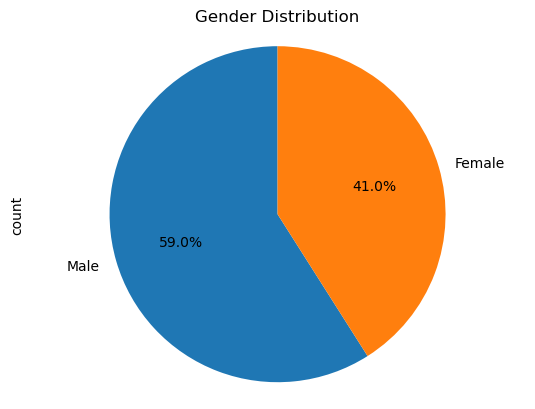

In [27]:
#piechart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()


# Insights

### Customer Preference 

In [28]:
# Most popular cuisines
popular_cuisines = df['Cuisines'].value_counts()
print("\nMost Popular Cuisines:")
print(popular_cuisines)


Most Popular Cuisines:
Cuisines
Japanese    36
Filipino    34
French      34
Indian      32
Chinese     24
Seafood     22
Italian     18
Name: count, dtype: int64


In [29]:
# Most popular activities
predominant_activities = df['Activity'].value_counts()
print("\nPredominant Activities:")
print(predominant_activities)


Predominant Activities:
Activity
Student         120
Professional     80
Name: count, dtype: int64


In [30]:
# Most popular locations
common_locations = df['Location'].value_counts()
print("Most Popular Locations:")
print(common_locations)

Most Popular Locations:
Location
St. George,NY         46
Central Park,NY       32
Upper East Side,NY    30
Riverdale,NY          28
China Town, NY        22
Market City, NY       20
Upper West Side,NY    18
Market City, MY        2
Cedar Hill, NY         2
Name: count, dtype: int64


#### Impact of demographics

In [31]:
# Gender-wise ratings
gender_ratings = df.groupby('Gender')[['Overall Rating', 'Food Rating', 'Service Rating']].mean()
print("\nGender-wise Ratings:")
print(gender_ratings)


Gender-wise Ratings:
        Overall Rating  Food Rating  Service Rating
Gender                                             
Female        3.335366     3.329268        3.341463
Male          3.148305     3.144068        3.152542


In [32]:
# Age group-wise ratings
age_groups = pd.cut(df['YOB'], bins=range(1900, 2023, 10), right=False)
df['Age Group'] = age_groups
age_group_ratings = df.groupby('Age Group')[['Overall Rating', 'Food Rating', 'Service Rating']].mean()
print("\nAge Group-wise Ratings:")
print(age_group_ratings)


Age Group-wise Ratings:
              Overall Rating  Food Rating  Service Rating
Age Group                                                
[1900, 1910)             NaN          NaN             NaN
[1910, 1920)             NaN          NaN             NaN
[1920, 1930)             NaN          NaN             NaN
[1930, 1940)             NaN          NaN             NaN
[1940, 1950)             NaN          NaN             NaN
[1950, 1960)        2.833333     3.277778        2.388889
[1960, 1970)        3.216667     3.166667        3.266667
[1970, 1980)        3.544118     3.382353        3.705882
[1980, 1990)        3.089286     2.928571        3.250000
[1990, 2000)        2.843750     2.718750        2.968750
[2000, 2010)        3.439655     3.551724        3.327586
[2010, 2020)             NaN          NaN             NaN


In [33]:
# Marital status-wise ratings
marital_status_ratings = df.groupby('Marital Status')[['Overall Rating', 'Food Rating', 'Service Rating']].mean()
print("\nMarital Status-wise Ratings:")
print(marital_status_ratings)


Marital Status-wise Ratings:
                Overall Rating  Food Rating  Service Rating
Marital Status                                             
Divorced              4.535714     4.642857        4.428571
Married               2.872093     2.697674        3.046512
Single                3.345000     3.470000        3.220000


#### Budget and Rating

In [34]:
# Correlation between budget and ratings
budget_rating_correlation = df[['Budget', 'Overall Rating', 'Food Rating', 'Service Rating']].corr()['Budget']
print("\nCorrelation between Budget and Ratings:")
print(budget_rating_correlation)


Correlation between Budget and Ratings:
Budget            1.000000
Overall Rating   -0.058049
Food Rating       0.057764
Service Rating   -0.135542
Name: Budget, dtype: float64


#### Location-specific insights

In [35]:
# Ratings by location
ratings_by_location = df.groupby('Location')[['Overall Rating', 'Food Rating', 'Service Rating']].mean()
print("\nRatings by Location:")
print(ratings_by_location)


Ratings by Location:
                    Overall Rating  Food Rating  Service Rating
Location                                                       
Cedar Hill, NY            3.500000     2.000000        5.000000
Central Park,NY           3.500000     3.343750        3.656250
China Town, NY            3.159091     2.681818        3.636364
Market City, MY           3.000000     4.000000        2.000000
Market City, NY           3.725000     4.050000        3.400000
Riverdale,NY              3.053571     3.035714        3.071429
St. George,NY             3.119565     3.413043        2.826087
Upper East Side,NY        3.016667     2.966667        3.066667
Upper West Side,NY        3.138889     3.000000        3.277778


#### Activity-specific Insights

In [36]:
# Ratings by activity
ratings_by_activity = df.groupby('Activity')[['Overall Rating', 'Food Rating', 'Service Rating']].mean()
print("\nRatings by Activity:")
print(ratings_by_activity)


Ratings by Activity:
              Overall Rating  Food Rating  Service Rating
Activity                                                 
Professional        3.443750     3.387500            3.50
Student             3.079167     3.108333            3.05


### plotting insights

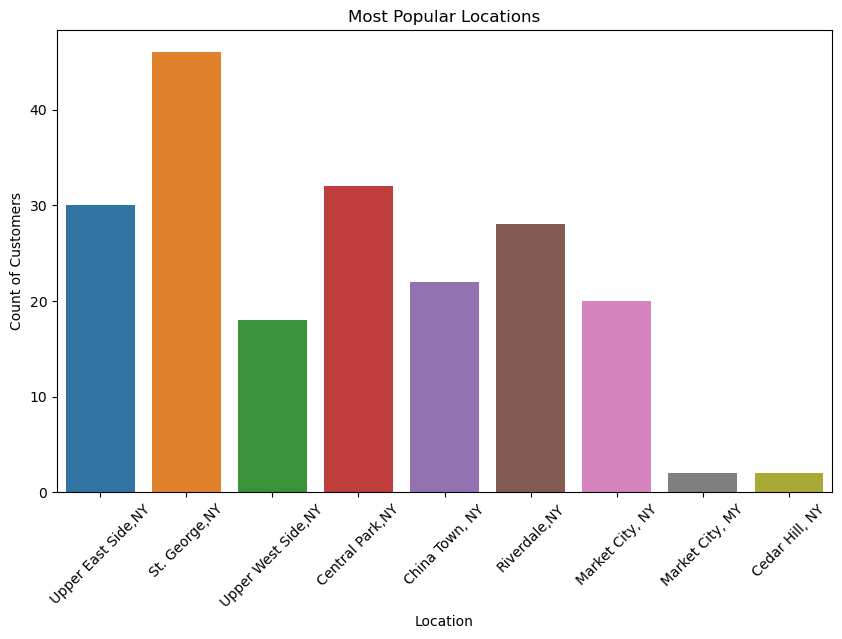

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Most Popular Locations
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location')
plt.title('Most Popular Locations')
plt.xlabel('Location')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.show()



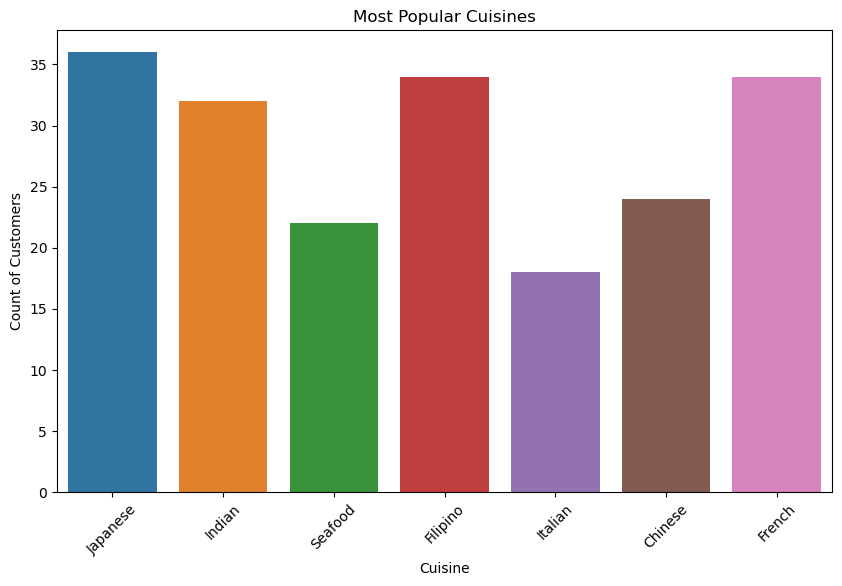

In [38]:
# Most Popular Cuisines
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cuisines')
plt.title('Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.show()


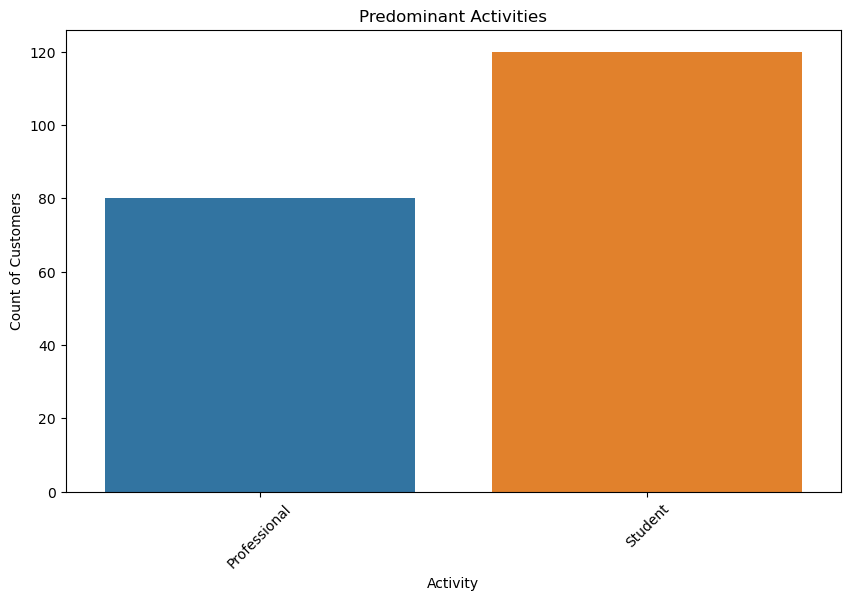

In [39]:
# Predominant Activities
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Activity')
plt.title('Predominant Activities')
plt.xlabel('Activity')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.show()



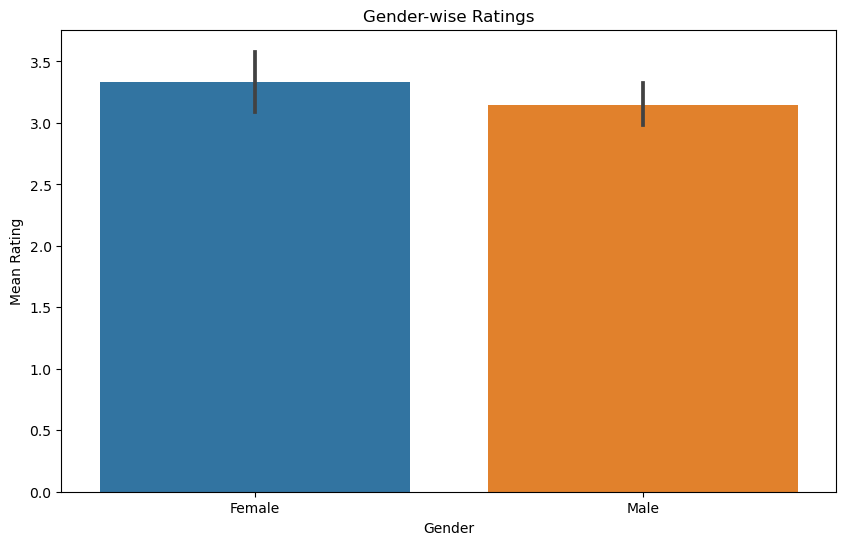

In [40]:
# Gender-wise Ratings
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender', y='Overall Rating')
plt.title('Gender-wise Ratings')
plt.xlabel('Gender')
plt.ylabel('Mean Rating')
plt.show()


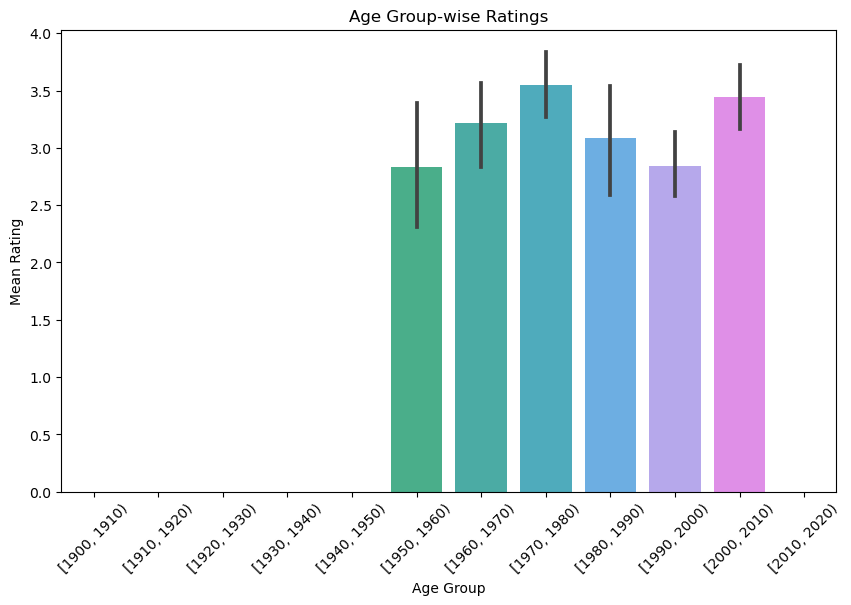

In [41]:

# Age Group-wise Ratings
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age Group', y='Overall Rating')
plt.title('Age Group-wise Ratings')
plt.xlabel('Age Group')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.show()


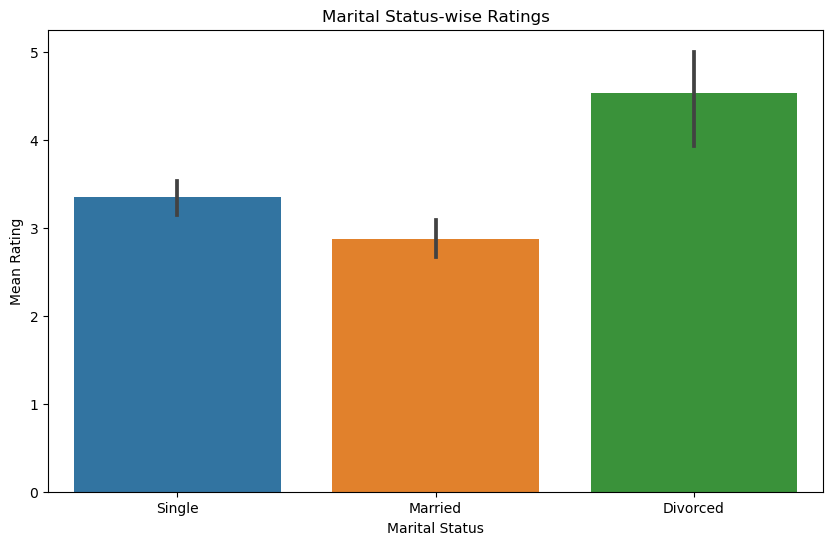

In [42]:

# Marital Status-wise Ratings
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Marital Status', y='Overall Rating')
plt.title('Marital Status-wise Ratings')
plt.xlabel('Marital Status')
plt.ylabel('Mean Rating')
plt.show()



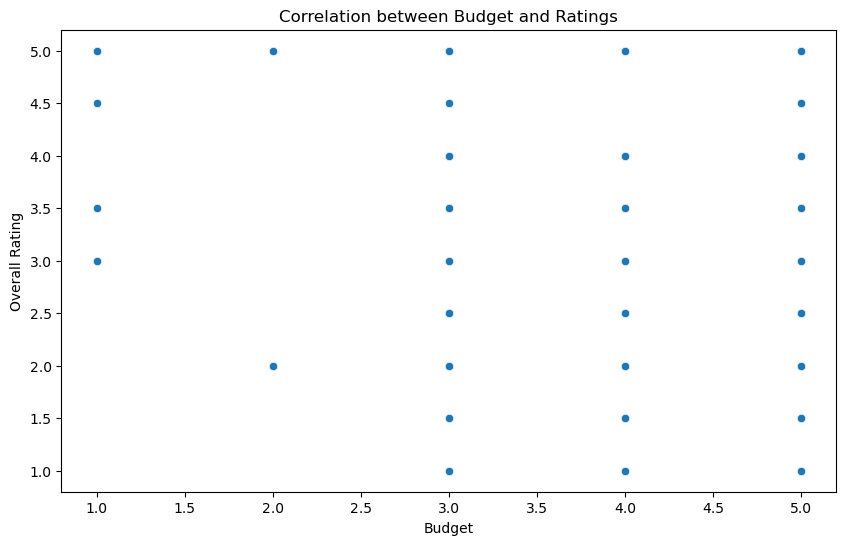

In [43]:
# Correlation between Budget and Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Budget', y='Overall Rating')
plt.title('Correlation between Budget and Ratings')
plt.xlabel('Budget')
plt.ylabel('Overall Rating')
plt.show()



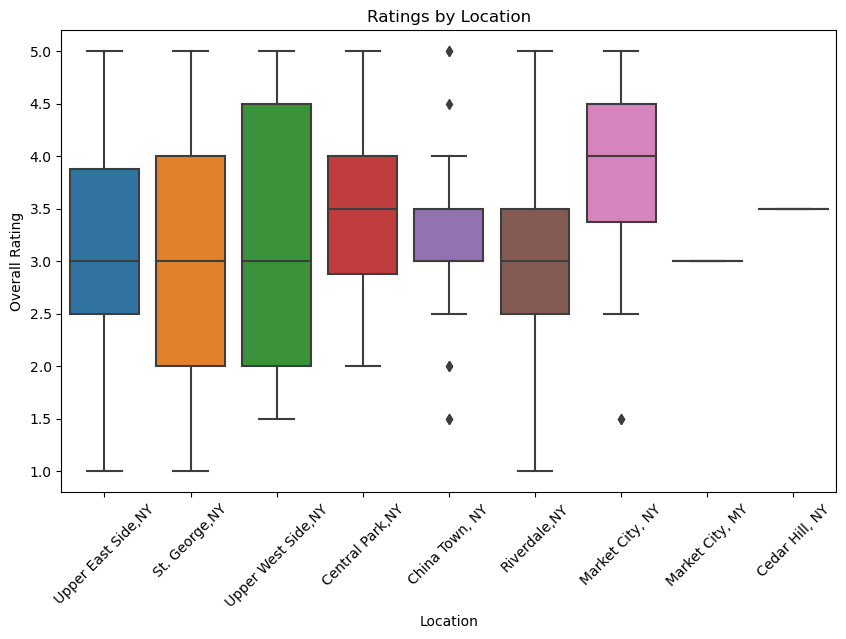

In [44]:
# Ratings by Location
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Location', y='Overall Rating')
plt.title('Ratings by Location')
plt.xlabel('Location')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.show()



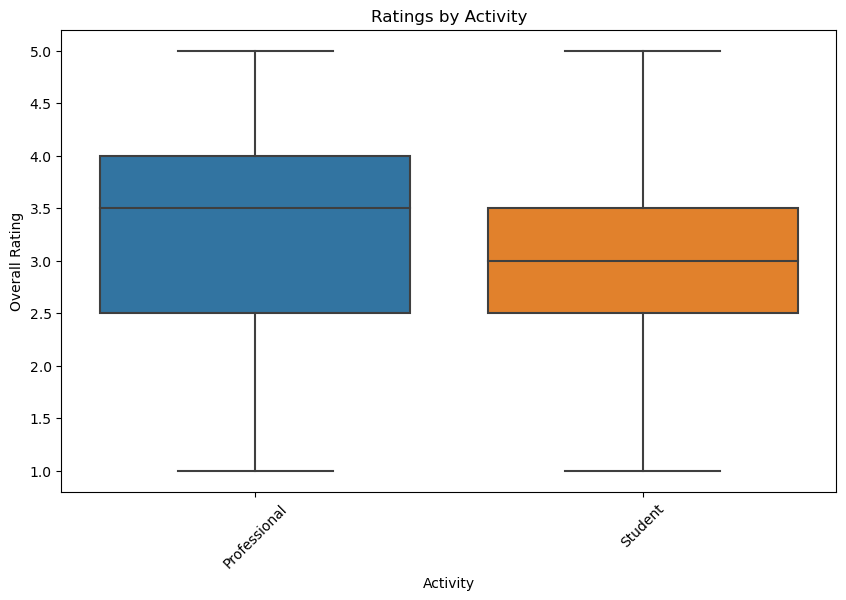

In [45]:
# Ratings by Activity
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Activity', y='Overall Rating')
plt.title('Ratings by Activity')
plt.xlabel('Activity')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.show()
